# Demo Perhitungan Error Tiga Titik

Notebook ini mendemokan cara menghitung selisih (error) antara tiga titik data dengan sebuah garis linier referensi.

In [5]:
# Mendefinisikan tiga titik data dan garis referensi
x_coords = [1, 3, 5]
y_coords = [2.5, 3.8, 4.1]
slope = 0.3  # kemiringan garis linier referensi
intercept = 2.5  # titik potong di sumbu y

line_values = [slope * x + intercept for x in x_coords]

print("Garis referensi: y = {:.1f}x + {:.1f}".format(slope, intercept))
for i, (x, y, y_line) in enumerate(zip(x_coords, y_coords, line_values), start=1):
    error = y - y_line
    abs_error = abs(error)
    sq_error = error ** 2
    print(f"Titik {i}: (x={x}, y={y}) -> y_garis={y_line:.2f}")
    print(f"  Error = y - y_garis = {y:.2f} - {y_line:.2f} = {error:.2f}")
    print(f"  |Error| = {abs_error:.2f}, Error^2 = {sq_error:.4f}\n")

total_abs_error = sum(abs(y - y_line) for y, y_line in zip(y_coords, line_values))
total_sq_error = sum((y - y_line) ** 2 for y, y_line in zip(y_coords, line_values))
print(f"Total |Error| = {total_abs_error:.2f}")
print(f"Total Error^2 = {total_sq_error:.4f}")

Garis referensi: y = 0.3x + 2.5
Titik 1: (x=1, y=2.5) -> y_garis=2.80
  Error = y - y_garis = 2.50 - 2.80 = -0.30
  |Error| = 0.30, Error^2 = 0.0900

Titik 2: (x=3, y=3.8) -> y_garis=3.40
  Error = y - y_garis = 3.80 - 3.40 = 0.40
  |Error| = 0.40, Error^2 = 0.1600

Titik 3: (x=5, y=4.1) -> y_garis=4.00
  Error = y - y_garis = 4.10 - 4.00 = 0.10
  |Error| = 0.10, Error^2 = 0.0100

Total |Error| = 0.80
Total Error^2 = 0.2600


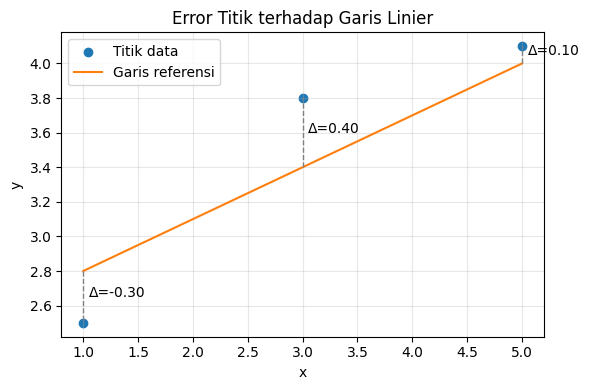

In [6]:
# Visualisasi titik data dan garis referensi
import matplotlib.pyplot as plt

try:
    x_coords  # pastikan sel sebelumnya sudah dijalankan
    y_coords
    slope
    intercept
except NameError as missing_var:
    raise RuntimeError(
        "Jalankan terlebih dahulu sel ke-2 untuk mendefinisikan titik dan parameter garis."
    ) from missing_var

# Hitung ulang nilai garis untuk visualisasi mandiri
line_values = [slope * x + intercept for x in x_coords]

plt.figure(figsize=(6, 4))
plt.scatter(x_coords, y_coords, color="tab:blue", label="Titik data")
plt.plot(x_coords, line_values, color="tab:orange", label="Garis referensi")

for x, y, y_line in zip(x_coords, y_coords, line_values):
    plt.vlines(x, y_line, y, colors="gray", linestyles="dashed", linewidth=1)
    plt.text(x + 0.05, (y + y_line) / 2, f"Δ={y - y_line:.2f}", fontsize=10)

plt.title("Error Titik terhadap Garis Linier")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Ketiga error dihitung manual dengan memasukkan setiap koordinat ke persamaan garis referensi lalu mengurangkan hasilnya dari nilai `y` aktual. Nilai `|Error|` berguna untuk melihat deviasi rata-rata, sedangkan `Error^2` sering dipakai sebagai dasar perhitungan *mean squared error*.

## Mengapa error diukur dari selisih y?

Dalam regresi linier sederhana kita mencoba memprediksi `y` dari setiap `x` menggunakan persamaan garis. Hasil prediksi untuk sebuah `x` adalah `y_hat` (nilai di garis), sehingga selisih yang kita pedulikan adalah `y - y_hat`. Itulah yang disebut **residual** atau error vertikal. Jika selisih nol berarti titik berada tepat di garis.

Alternatif ukuran error bisa muncul dalam konteks lain:
- Jika kita memodelkan `x` dari `y`, residual-nya menjadi selisih di sumbu `x`.
- Jika kita ingin jarak terpendek ke garis (bukan hanya vertikal), kita perlu memakai jarak Euclidean ke garis, bukan sekadar `y - y_hat`.

Namun, untuk regresi linier klasik yang meminimalkan *sum of squared errors*, definisi standarnya memang selisih pada sumbu `y` karena kita memprediksi nilai `y` dari `x`.